<a href="https://colab.research.google.com/github/Erick88santos/mineracao-dados/blob/main/CRISP_DMbodyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Body Performance**

##Classificando a base de dados da [Kaggle](https://www.kaggle.com/datasets/kukuroo3/body-performance-data). Em qual idade existe maior índice de massa gorda em Homens e Mulheres.

####**Alunos**:Erick Santos e Talles Ian

In [9]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from tensorflow import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.experimental import (
    enable_iterative_imputer,
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

In [14]:
df = pd.read_csv('bodyPerformance.csv')
df.head(12)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [16]:
df = df.drop(columns=['gripForce','sit-ups counts','broad jump_cm','sit and bend forward_cm','diastolic','systolic', 'class'])


In [17]:
df

,age,gender,height_cm,weight_kg,body fat_%
0,27.0,M,172.3,75.24,21.3
1,25.0,M,165.0,55.80,15.7
2,31.0,M,179.6,78.00,20.1
3,32.0,M,174.5,71.10,18.4
4,28.0,M,173.8,67.70,17.1
...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2
13389,21.0,M,179.7,63.90,12.1
13390,39.0,M,177.2,80.50,20.1
13391,64.0,F,146.1,57.70,40.4


#**Excluindo as linhas desnecessárias**

**deixando apenas 12 linhas**

In [18]:
df.head(12)

,age,gender,height_cm,weight_kg,body fat_%
0,27.0,M,172.3,75.24,21.3
1,25.0,M,165.0,55.80,15.7
2,31.0,M,179.6,78.00,20.1
3,32.0,M,174.5,71.10,18.4
4,28.0,M,173.8,67.70,17.1
5,36.0,F,165.4,55.40,22.0
6,42.0,F,164.5,63.70,32.2
7,33.0,M,174.9,77.20,36.9
8,54.0,M,166.8,67.50,27.6
9,28.0,M,185.0,84.60,14.4


#**Checando se existe alguma variável nula**

In [19]:
df.isnull().sum()

age           0
gender        0
height_cm     0
weight_kg     0
body fat_%    0
dtype: int64

#**Análise Exploratória**

In [20]:
df.describe()

,age,height_cm,weight_kg,body fat_%
count,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165
std,13.625639,8.426583,11.949666,7.256844
min,21.000000,125.000000,26.300000,3.000000
25%,25.000000,162.400000,58.200000,18.000000
50%,32.000000,169.200000,67.400000,22.800000
75%,48.000000,174.800000,75.300000,28.000000
max,64.000000,193.800000,138.100000,78.400000


#**Verificando os tipos dos dados, afim de evitar erros dentro do código.**


In [21]:
df.corr()

,age,height_cm,weight_kg,body fat_%
age,1.000000,-0.293980,-0.099966,0.242302
height_cm,-0.293980,1.000000,0.734909,-0.515440
weight_kg,-0.099966,0.734909,1.000000,-0.084065
body fat_%,0.242302,-0.515440,-0.084065,1.000000


# #**KMeans Clustering with 4 Clusters**

In [22]:
Model = KMeans(n_clusters=4 ,init="k-means++", max_iter=1000)
Model.fit_predict(df[['body fat_%']])

array([3, 1, 3, ..., 3, 2, 3], dtype=int32)

#**Modelagem dos centróides**

In [23]:
centroids = Model.cluster_centers_
centroids

array([[27.15291916],
       [13.93381123],
       [35.2172192 ],
       [20.7277717 ]])

#**Juntar os Clusteres**

In [24]:
df['Clusters'] = Model.labels_
df.head()

,age,gender,height_cm,weight_kg,body fat_%,Clusters
0,27.0,M,172.3,75.24,21.3,3
1,25.0,M,165.0,55.80,15.7,1
2,31.0,M,179.6,78.00,20.1,3
3,32.0,M,174.5,71.10,18.4,3
4,28.0,M,173.8,67.70,17.1,1


#**Contando os valores dos Clusters**

In [25]:
df['Clusters'].value_counts()

3    4587
0    3885
1    2942
2    1979
Name: Clusters, dtype: int64

#Fazendo a correlação entre as informações, nesse momento, **superficialmente** , dá para se ter uma noção de como se comporta as tendências da base

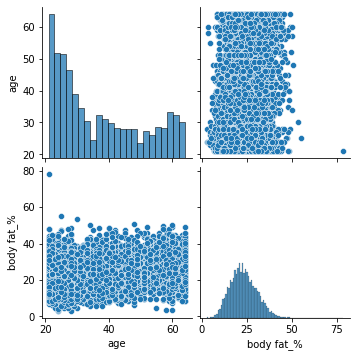

In [26]:
sns.pairplot(df[['age','body fat_%']])

**Como vimos acima temos a correlação de idade e massa gorda.**

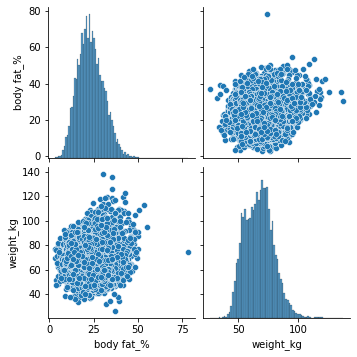

In [27]:
sns.pairplot(df[['body fat_%','weight_kg']])

**Acima a correlação de massa gorda por idade.**

#**Visualizando uma correlação entre as nossas informações**

###Massa gorda

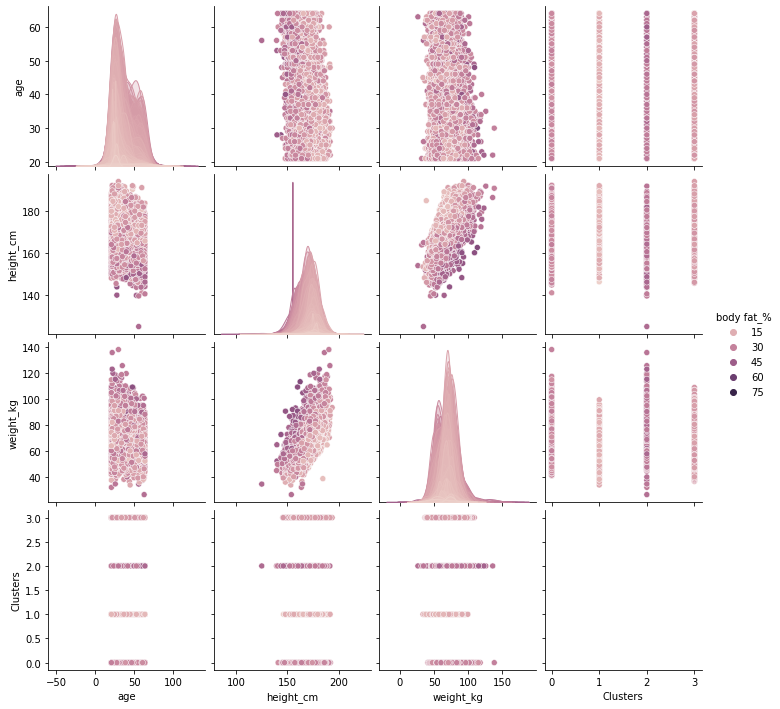

In [28]:
ax = sns.pairplot(df, hue='body fat_%')

#**Visualizando uma correlação entre as nossas informações**

###Gênero.

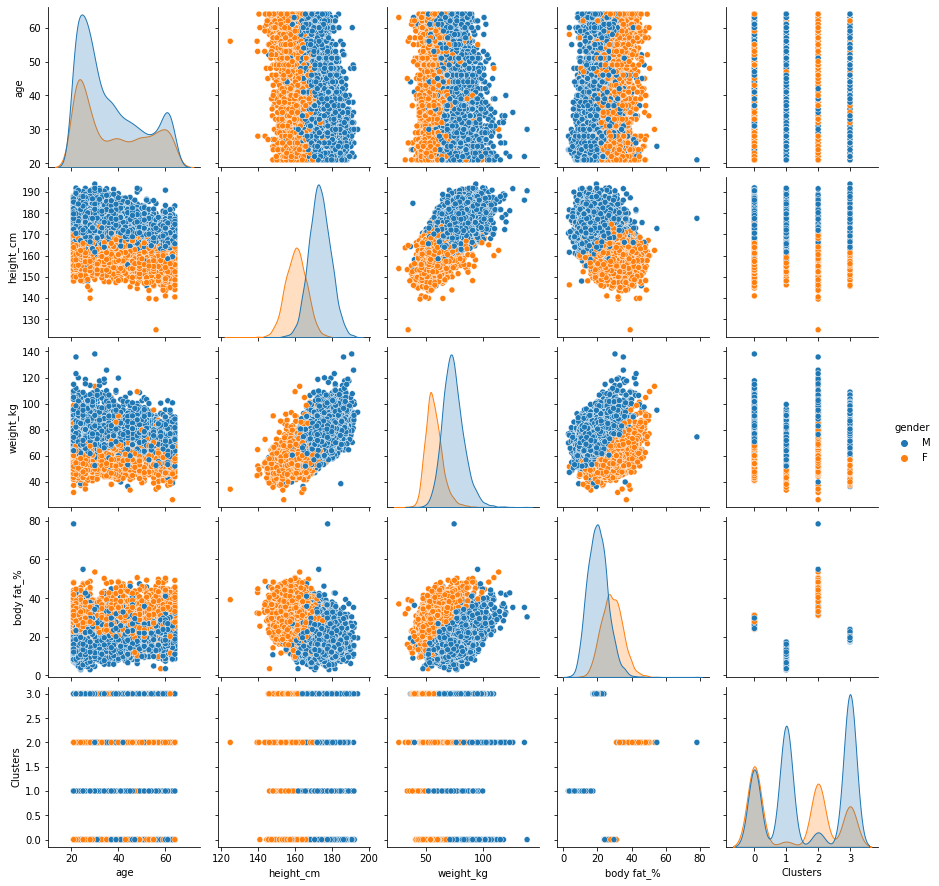

In [29]:
ax = sns.pairplot(df, hue='gender')

#**Separação de correlação**
###Idade e percentual de gordura das pessoas de gêneros diferentes

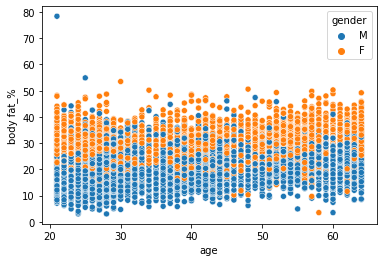

In [30]:
sns.scatterplot(x='age',y='body fat_%',data=df, hue='gender')
plt.show()

##**Percebe-se que os homens possuem em média 20% de massa gorda, enquanto as mulheres possuem de 35% de massa gorda** 



#**KNN para Classificação**
**Importando as bibliotecas necessárias**

In [ ]:
import pandas as pd #manipulação de dataset
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia

#**Importando o conjunto de dados do Kaggle**

In [ ]:
url = 'https://www.kaggle.com/datasets/kukuroo3/body-performance-data'
data = pd.read_csv('bodyPerformance.csv')
data.head(12)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [ ]:
df['Clusters'] = Model.labels_
df.head(12)

,age,gender,height_cm,weight_kg,body fat_%,Clusters
0,27.0,M,172.3,75.24,21.3,0
1,25.0,M,165.0,55.80,15.7,2
2,31.0,M,179.6,78.00,20.1,0
3,32.0,M,174.5,71.10,18.4,0
4,28.0,M,173.8,67.70,17.1,2
5,36.0,F,165.4,55.40,22.0,0
6,42.0,F,164.5,63.70,32.2,1
7,33.0,M,174.9,77.20,36.9,1
8,54.0,M,166.8,67.50,27.6,3
9,28.0,M,185.0,84.60,14.4,2


#**Diferença de Genero** 

In [ ]:
y = df['gender']
X = df.iloc[ :, [5,3]].values

#**Pré-Processamento Básico Padronizando as Variáveis Contínuas**

In [ ]:
X = MinMaxScaler().fit_transform(X)

#**Separando o dados em Treino e Teste**

In [ ]:

x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)



#**Ajustando o KNN nos dados de Treino**

In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(x_treino, y_treino)



KNeighborsClassifier(n_neighbors=2)

#**Calculando a Matriz de Confusão nos dados de Teste**

In [ ]:
#Calculando a matriz de confusão
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     F     M   All
Real                     
F        1196    59  1255
M         219  1875  2094
All      1415  1934  3349


#**Calculando as métricas de validação** 
**Acurácia**

In [ ]:
# Acurácia
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.916990


#**Balanceamento dos dados**

In [32]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)



In [33]:
!pip install -q scikit-plot

In [34]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [35]:
file_path = "https://www.kaggle.com/datasets/kukuroo3/body-performance-data"

# importar os dados para um dataframe
df = pd.read_csv('bodyPerformance.csv')


#**Plotar gráfico de barras para os gêneros**

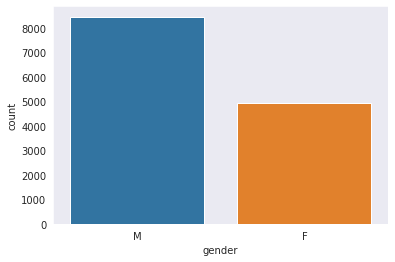

In [36]:
sns.countplot('gender', data=df);

# **Ver o balanceamento das colunas gênero e determinar a quantidade de cada.**

**obtendo o percentual de erross**

In [37]:


print(df.gender.value_counts())
print("\nErros representam {:.4f}% do dataset.\n".format((df[df.gender == 1].shape[0] / df.shape[0]) * 100))


M    8467
F    4926
Name: gender, dtype: int64

Erros representam 0.0000% do dataset.



#**separar variáveis entre X e y**

In [38]:
X = df.drop('gender', axis=1)
y = df['gender']


#**dividir o dataset entre treino e teste**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)



#**Converter String em float**

In [40]:
import pandas as pd
import re

In [80]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%
0,27.0,M,172.3,75.24,21.3
1,25.0,M,165.0,55.80,15.7
2,31.0,M,179.6,78.00,20.1
3,32.0,M,174.5,71.10,18.4
4,28.0,M,173.8,67.70,17.1


#NESSE PONTO DE CONVERSÂO EM FLOAT deu erro e não conseguimos progredir.

tentamos esse método

In [111]:
df['gender'] = df['gender'].str.replace('.','.')


depois esse

In [ ]:
df['gender'] = df['gender'].str.replace(',','.').astype(float)

porém não conseguimos êxito.

In [105]:
df['gender'] = df['gender'].astype(int)

ValueError: ignored

In [97]:
df.dtypes

age           float64
gender         object
height_cm     float64
weight_kg     float64
body fat_%    float64
dtype: object

In [94]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%
0,27.0,M,172.3,75.24,21.3
1,25.0,M,165.0,55.80,15.7
2,31.0,M,179.6,78.00,20.1
3,32.0,M,174.5,71.10,18.4
4,28.0,M,173.8,67.70,17.1


#**instanciar e treinar um modelo de Regressão Logística**

In [91]:

model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: ignored

# **Fazer as previsões em cima dos dados de teste**

In [41]:
df = pd.read_csv('bodyPerformance.csv')
df = df.drop(columns=['gripForce','sit-ups counts','broad jump_cm','sit and bend forward_cm','diastolic','systolic', 'class'])
df

,age,gender,height_cm,weight_kg,body fat_%
0,27.0,M,172.3,75.24,21.3
1,25.0,M,165.0,55.80,15.7
2,31.0,M,179.6,78.00,20.1
3,32.0,M,174.5,71.10,18.4
4,28.0,M,173.8,67.70,17.1
...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2
13389,21.0,M,179.7,63.90,12.1
13390,39.0,M,177.2,80.50,20.1
13391,64.0,F,146.1,57.70,40.4


In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# **plotar a matriz de confusão**


In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# **imprimir relatório de classificação**


In [ ]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))


#**imprimir a acurácia do modelo**

In [ ]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
